<a href="https://colab.research.google.com/github/VladOS95-cyber/deeplearning_practice/blob/main/SOM_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled_X = sc.fit_transform(X)

##Training the SOM


In [4]:
!pip install MiniSom

In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15)

In [6]:
som.random_weights_init(scaled_X)
som.train_random(scaled_X, 100)

##Visualizing the results


In [7]:
from pylab import bone, pcolor, colorbar, plot, show

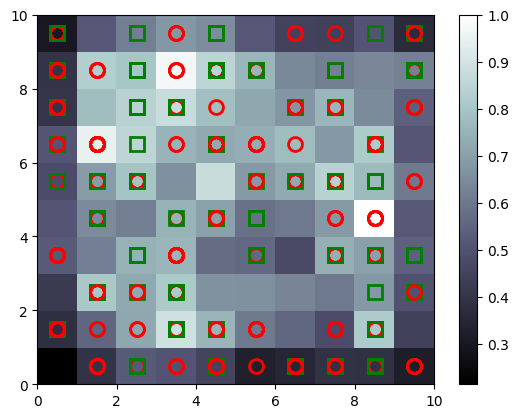

In [8]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(scaled_X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2
       )
show()

## Finding the frauds


In [16]:
mappings = som.win_map(scaled_X)
frauds = np.concatenate((mappings[(8, 4)], mappings[(3, 8)], mappings[(1, 6)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print('CustomerId')
for i in frauds:
    for j in i:
        print(j, end=" ")
    print()

CustomerId
15719940.0 0.0 35.17 3.75 2.0 1.0 1.0 0.0 0.0 1.0 6.0 0.0 2.0 0.0 201.0 
15711742.0 0.0 23.0 1.835 2.0 5.0 3.0 0.0 0.0 1.0 1.0 0.0 2.0 200.0 53.99999999999999 
15761733.0 0.0 16.08 0.335 2.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 2.0 160.0 127.0 
15770995.0 0.0 40.33 8.125 1.0 4.0 4.0 0.165 0.0 1.0 2.0 0.0 2.0 184.0 19.0 
15736399.0 0.0 36.58 0.29 2.0 1.0 1.0 0.0 0.0 1.0 10.0 0.0 2.0 200.0 19.0 
15766734.0 0.0 27.17 1.25 2.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 2.0 92.0 301.0 
15667934.0 0.0 57.58 2.0 2.0 1.0 1.0 6.5 0.0 1.0 1.0 0.0 2.0 0.0 11.0 
15665087.0 0.0 18.250000000000004 10.0 2.0 9.0 4.0 1.0 0.0 1.0 1.0 0.0 2.0 120.0 2.0 
15705918.0 0.0 37.33 2.5 2.0 3.0 8.0 0.21 0.0 0.0 0.0 0.0 2.0 260.0 247.00000000000003 
15675926.0 0.0 19.17 5.415 2.0 3.0 8.0 0.29 0.0 0.0 0.0 0.0 2.0 80.0 485.0 
15660528.0 0.0 21.92 11.665 2.0 4.0 8.0 0.085 0.0 0.0 0.0 0.0 2.0 320.0 6.0 
15666096.0 0.0 52.50000000000001 7.0 2.0 6.0 8.0 3.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 
15767729.0 1.0 20.0 1.25 1.0 4.0 4.0 0.125 0.0 